In [10]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys

# Data Visualization

Text(0, 0.5, 'Number of accidents')

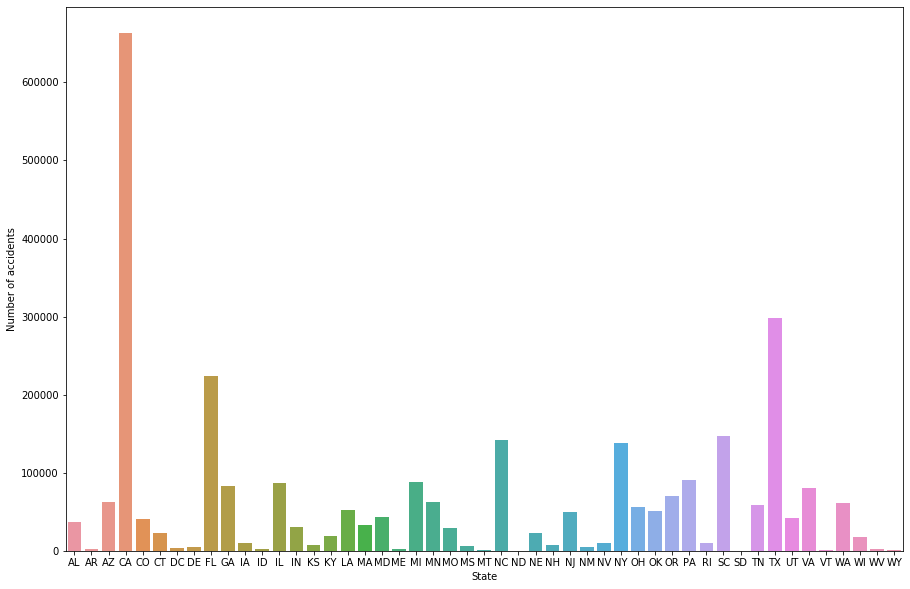

In [114]:
path = os.getcwd()

data_df = pd.read_csv((path+'/US_Accidents_Dec19.csv'),index_col=False)
data_df = data_df.drop(columns = ['Start_Lat','Start_Lng','End_Lat','End_Lng','Source','TMC'])
#df = data_df.drop(['ID'],axis = 1)
data_df.head(5)
[row,col] = data_df.shape
state_count = ((data_df.groupby('State').count())['ID'])
plt.figure(figsize=(15,10))
ax = sns.barplot(state_count.index, state_count.values)
plt.ylabel('Number of accidents')

### Figure 1 
##### California and Texas are states with most number of accidents 

Text(0, 0.5, 'Percentage of accidents')

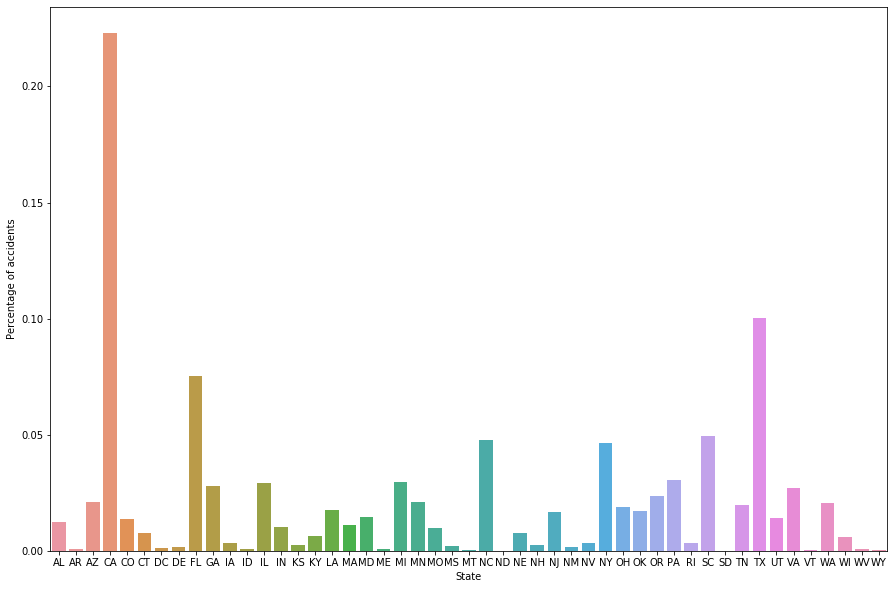

In [115]:
#df = data_df.drop(['ID'],axis = 1)
data_df.head(5)
[row,col] = data_df.shape
state_count = ((data_df.groupby('State').count())['ID'])
plt.figure(figsize=(15,10))
ax = sns.barplot(state_count.index, state_count.values/row)
plt.ylabel('Percentage of accidents')

# Figure 2
##### Over 20% of all accident occurs in the state of california, and over 10 percent of accidients occur in Texas

Text(0, 0.5, 'Ratio of accident to number of people')

<Figure size 1080x720 with 0 Axes>

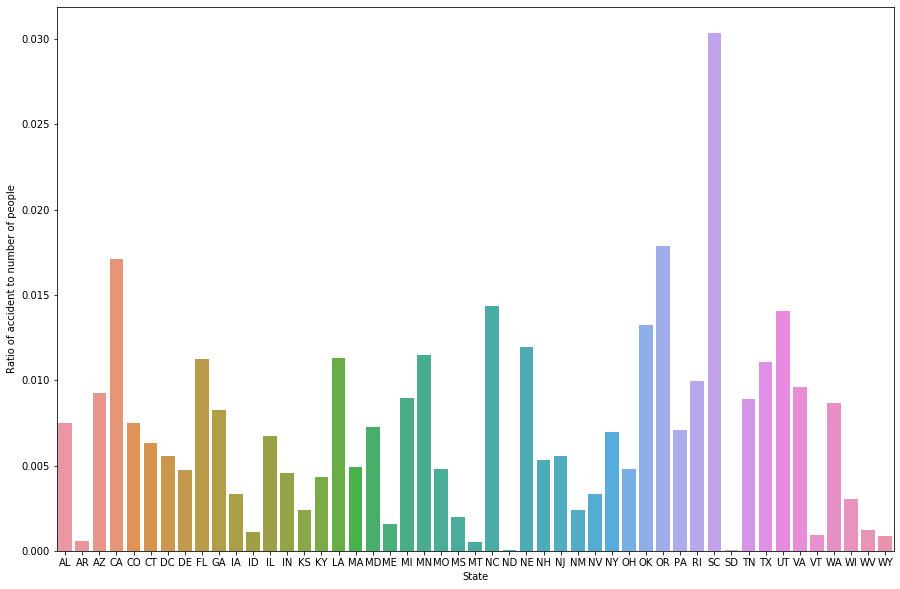

In [116]:
state_population_df = pd.read_csv((path+'/state_population_copy.csv'),index_col= 'Postal')
plt.figure(figsize=(15,10))
state_population = state_population_df.drop(index = ['AR','IA'])
state_population_df = state_population_df.sort_values(by = 'Postal')
state_population_df['count'] = state_count
plt.figure(figsize=(15,10))
state_population_df = state_population_df.dropna()
state_population_df.head()

ax = sns.barplot(state_count.index, 
                 state_population_df['count']/state_population_df['Population'])
plt.ylabel('Ratio of accident to number of people')

### Figure 2 
##### Average over the population south Decoda has the worse number of accidents compared to their population

TypeError: Cannot cast scalar from dtype('<m8[ns]') to dtype('<m8') according to the rule 'same_kind'

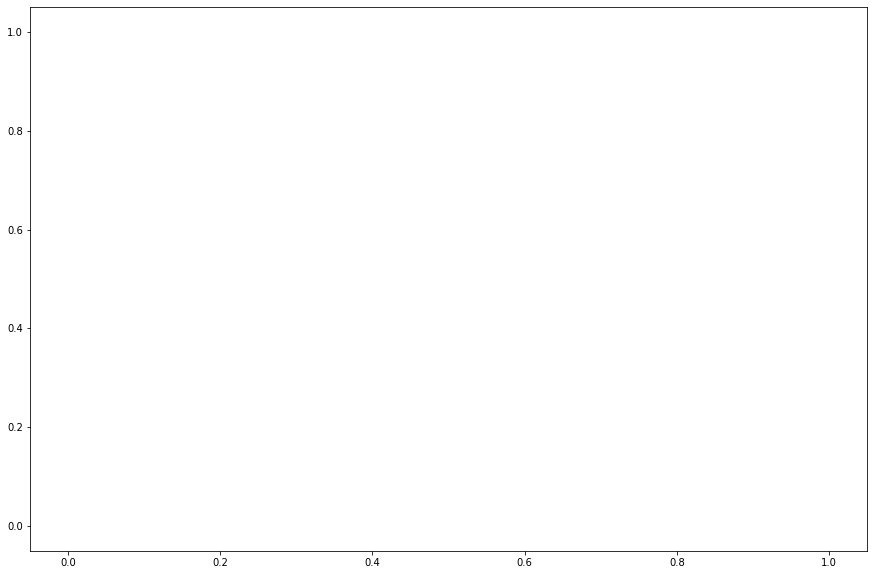

In [187]:
plt.figure(figsize=(15,10))
test = (pd.to_datetime(data_df['End_Time']) - pd.to_datetime(data_df['Start_Time']))/np.timedelta64(1,'m')
sns.scatterplot(x = data_df.index,y = test)
plt.xlabel('Id')
plt.ylabel('Duration')
plt.title('Accident times')
new_data_df = data_df.drop(columns = ['End_Time','Start_Time'])

# Feature generation

Index(['ID', 'Severity', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [138]:
from sklearn.preprocessing import LabelEncoder
cols = ('Street','Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp','Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(new_data_df[c].values)) 
    new_data_df[c] = lbl.transform(list(new_data_df[c].values))

In [132]:

incode = LabelEncoder()
new_data_df['Weather_Condition'] = incode.fit_transform(list(new_data_df['Weather_Condition'].values))


In [139]:
plt.figure(figsize = (40,40))

coor_value = ((new_data_df.corr()['Severity']).abs())

<Figure size 2880x2880 with 0 Axes>

In [143]:
coor_value.sort_values()

Roundabout               0.003843
Bump                     0.005455
Visibility(mi)           0.006136
No_Exit                  0.006709
Traffic_Calming          0.006786
Airport_Code             0.007700
Give_Way                 0.007847
City                     0.008162
Timezone                 0.013703
Precipitation(in)        0.016632
Pressure(in)             0.018289
Humidity(%)              0.023188
Railway                  0.023666
Number                   0.023979
Temperature(F)           0.029132
Wind_Speed(mph)          0.030343
Weather_Condition        0.035218
State                    0.037516
Amenity                  0.049221
Station                  0.052094
Stop                     0.055394
Zipcode                  0.057871
Weather_Timestamp        0.058940
Junction                 0.063437
Sunrise_Sunset           0.068988
County                   0.074298
Civil_Twilight           0.076560
Wind_Chill(F)            0.079993
Nautical_Twilight        0.083870
Astronomical_T

In [205]:
X_data = data_df[(['Crossing','Side', 'Wind_Chill(F)','Astronomical_Twilight','Traffic_Signal','Severity']) ]
X_data = X_data.dropna()
y_label = X_data['Severity']
X_data = X_data.drop(columns = 'Severity',axis = 1)
#X_data.shape
#y_label.shape

In [206]:
from sklearn.model_selection import train_test_split
cols = ('Crossing','Side','Astronomical_Twilight','Traffic_Signal')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_data[c].values)) 
    X_data[c] = lbl.transform(list(X_data[c].values))
X_data = X_data.dropna()

X_train, X_Valid, Y_train, Y_Valid=train_test_split(X_data,y_label, test_size=0.15, random_state=4)

In [207]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, bootstrap = True )
model.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [208]:
from sklearn import metrics
prediction = model.predict(X_Valid)
metrics.accuracy_score(prediction, Y_Valid)

0.6986799641016802

In [209]:
from sklearn.ensemble import AdaBoostClassifier 
model_ada = AdaBoostClassifier(n_estimators=50)
model_ada.fit(X_train,Y_train)
prediction = model_ada.predict(X_Valid)
metrics.accuracy_score(prediction, Y_Valid)

0.6982520371107795

In [211]:
type(y_label)

pandas.core.series.Series

In [225]:
final_data = X_train
final_data['label'] = y_label
final_data= final_data.reset_index(drop = True)

/Users/abhay/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [227]:
final_data.head()
final_data.to_csv((path+'Final_data.csv'))